In [85]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load) 
ride_data.head()

# Combine the data into a single dataset

cityride_df = city_data.merge(ride_data, on='city', how = "inner")

# Display the data table for preview

cityride_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [86]:
urban = cityride_df[cityride_df['type'] == 'Urban']
suburban = cityride_df[cityride_df['type'] == 'Suburban']
rural = cityride_df[cityride_df['type'] == 'Rural']

urban.head(3)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416


In [202]:
Ucity = urban.groupby(['city'])
Ufare = Ucity.fare.mean()
Urides = Ucity['ride_id'].count()
Udriver = Ucity['driver_count'].mean()


Scity = suburban.groupby(['city'])
Sfare = Scity.fare.mean()
Srides = Scity['ride_id'].count()
Sdriver = Scity['driver_count'].mean()

Rcity = rural.groupby(['city'])
Rfare = Rcity.fare.mean()
Rrides = Rcity['ride_id'].count()
Rdriver = Rcity['driver_count'].mean()



## Bubble Plot of Ride Sharing Data

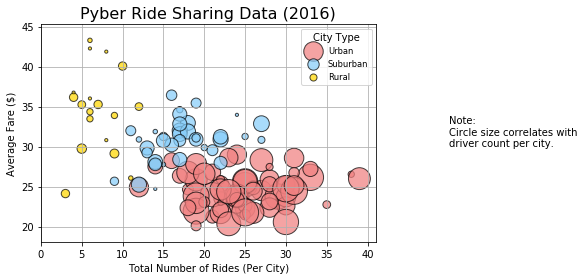

In [134]:
# Obtain the x and y coordinates for each of the three city types

ridesmax = max([Urides.max(), Srides.max(), Rrides.max()])
x_limit = ridesmax + 2
plt.xlim(0, x_limit)

faremax = max([Ufare.max(), Sfare.max(), Rfare.max()])
y_limit = faremax + 2
faremin = min([Ufare.min(), Sfare.min(), Rfare.min()])
y_begin = faremin - 2

plt.ylim(y_begin, y_limit)



plt.scatter(Urides, Ufare, s=10*Udriver, c="lightcoral", edgecolor="black", 
            linewidths=1, alpha=0.72, marker='o', label="Urban")
plt.scatter(Srides, Sfare, s=10*Sdriver, c="lightskyblue", edgecolor="black", 
            linewidths=1, alpha=0.72, marker='o', label="Suburban")
plt.scatter(Rrides, Rfare, s=10*Rdriver, c="gold", edgecolor="black", 
            linewidths=1, alpha=0.72, marker='o', label="Rural")


plt.title("Pyber Ride Sharing Data (2016)", Fontsize = 16)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")




# Build the scatter plots for each city types



# Incorporate the other graph properties

# Create a legend

legend = plt.legend(fontsize="small", loc="best", title="City Type")

plt.grid(True)

# Incorporate a text label regarding circle size

plt.text(50,30,"Note:\nCircle size correlates with\ndriver count per city.")




# Save Figure

plt.savefig("PyberRideSharingScatterplot.pdf")

plt.show()


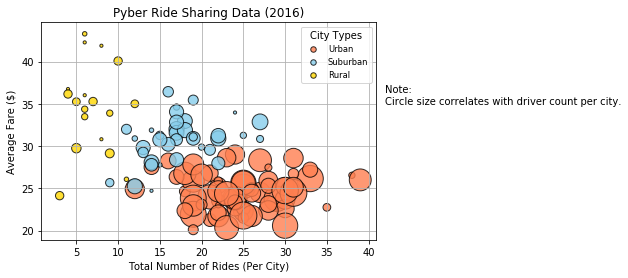

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

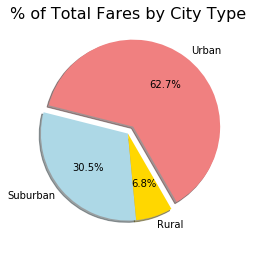

In [177]:
# Calculate Type Percents

Ufares = sum(urban["fare"])
Sfares = sum(suburban["fare"])
Rfares = sum(rural["fare"])

fares = [Ufares, Sfares, Rfares]
labels = ["Urban", "Suburban", "Rural"]

colors = ["lightcoral", "lightblue", "gold"]
explode = (0.1, 0, 0)

plt.title("% of Total Fares by City Type", Fontsize = 16)

# Build Pie Chart

plt.pie(fares, explode=explode, colors=colors, autopct="%1.1f%%", labels=labels, shadow=True, startangle=300)

# plt.pie(fares, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=45)

# Save Figure

plt.savefig("PyberFare%PieChart.pdf")

plt.show()

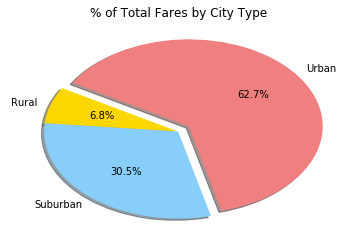

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

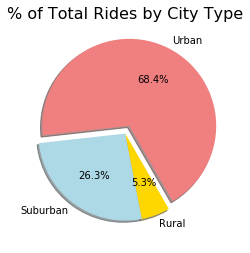

In [178]:
# Calculate Type Percents

Uridesnum = len(urban["ride_id"])
Sridesnum = len(suburban["ride_id"])
Rridesnum = len(rural["ride_id"])

ridesnum = [Uridesnum, Sridesnum, Rridesnum]
labels = ["Urban", "Suburban", "Rural"]

colors = ["lightcoral", "lightblue", "gold"]
explode = (0.1, 0, 0)

plt.title("% of Total Rides by City Type", Fontsize = 16)

# Build Pie Chart

plt.pie(ridesnum, explode=explode, colors=colors, autopct="%1.1f%%", labels=labels, shadow=True, startangle=300)

# plt.pie(fares, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=45)

# Save Figure

plt.savefig("PyberRides%PieChart.pdf")

plt.show()





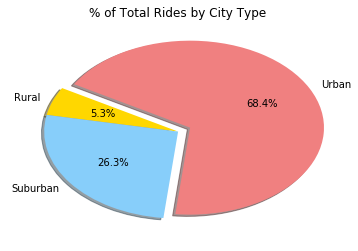

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


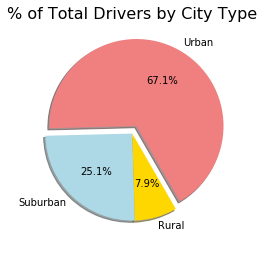

In [204]:
Udrivers = sum(urban["driver_count"])/len(urban["driver_count"])
Sdrivers = sum(suburban["driver_count"])/len(suburban["driver_count"])
Rdrivers = sum(rural["driver_count"])/len(rural["driver_count"])
Rdrivers

drivernum = [Udrivers, Sdrivers, Rdrivers]
labels = ["Urban", "Suburban", "Rural"]

colors = ["lightcoral", "lightblue", "gold"]
explode = (0.1, 0, 0)

plt.title("% of Total Drivers by City Type", Fontsize = 16)

# Build Pie Chart

plt.pie(drivernum, explode=explode, colors=colors, autopct="%1.1f%%", labels=labels, shadow=True, startangle=300)

# plt.pie(fares, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=45)

# Save Figure

plt.savefig("PyberDriver%PieChart.pdf")

plt.show()


In [192]:
Udrivers = len(Ucity['driver_count'])
Sdrivers = len(Scity['driver_count'])
Rdrivers = len(Rcity['driver_count'])
Tdrivers = Udrivers + Sdrivers + Rdrivers
Rdrivers

18

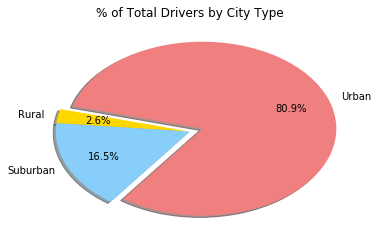

In [6]:
# Show Figure
plt.show()

In [ ]:
SUMMARY

Data Trends

1.	There are fewer riders in rural areas, but the fares are higher.
2.	Though the fares in urban areas are lower, there are more drivers and rides purchased than in suburban or rural areas.
3.	The company makes more money from rides in urban areas.  Suburban rides and money fall in the middle of urban and rural in all areas.
